In [1]:
import pandas as pd
import requests
import time 

In [2]:
## api configuration 
API_KEY ="cqt_rQGXq6fwCBDXV4ckvD7mP4HPmk7q"
base_url = "https://api.covalenthq.com/v1"


In [3]:
## load wallets
df=pd.read_csv("Wallet_id .csv")
wallets =df.iloc[:, 0].tolist()  
print(f"Loaded {len(wallets)} wallet addresses.")

Loaded 103 wallet addresses.


In [4]:
###  fetch transaction from compound v2 (using covalent api)
## created function to fetch wallet transactions from compound 
def fetch_wallet_transactions(wallet_address,chain_id=1):
    url=f"{base_url}/{chain_id}/address/{wallet_address}/transactions_v2/"
    params={
        "key":API_KEY
    }
    response=requests.get(url, params=params)
    if response.status_code == 200:
        data=response.json()
        items = data.get('data', {}).get('items', [])
        if not items:
            print(f"No transactions found for {wallet_address} ")
            return pd.DataFrame()
        return pd.DataFrame(items)
    else:
        
        print(f"Error {response.status_code} for wallet: {wallet_address}")
        return pd.DataFrame()


In [5]:
## fetch all transactions for all wallets
all_transactions = pd.DataFrame()
for wallet in wallets:
    print(f"Fetching data for: {wallet}")
    tx_df = fetch_wallet_transactions(wallet)
    if not tx_df.empty:
        tx_df['wallet_id'] = wallet
        all_transactions = pd.concat([all_transactions, tx_df], ignore_index=True)
    time.sleep(0.5)  
 ## save to csv    
all_transactions.to_csv("wallet_transactions_compound.csv", index=False)

Fetching data for: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3
Fetching data for: 0x06b51c6882b27cb05e712185531c1f74996dd988
Fetching data for: 0x0795732aacc448030ef374374eaae57d2965c16c
Fetching data for: 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
Fetching data for: 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
Fetching data for: 0x104ae61d8d487ad689969a17807ddc338b445416
Fetching data for: 0x111c7208a7e2af345d36b6d4aace8740d61a3078
Fetching data for: 0x124853fecb522c57d9bd5c21231058696ca6d596
Fetching data for: 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc
Fetching data for: 0x1656f1886c5ab634ac19568cd571bc72f385fdf7
Fetching data for: 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22
Fetching data for: 0x19df3e87f73c4aaf4809295561465b993e102668
Fetching data for: 0x1ab2ccad4fc97c9968ea87d4435326715be32872
Fetching data for: 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f
Fetching data for: 0x1e43dacdcf863676a6bec8f7d6896d6252fac669
Fetching data for: 0x22d7510588d90ed5a87e0f838391aaafa707c34b
Fetching

### Data Preparation  and feature engineering 

In [6]:
## loading transactional data that i fetched before 
df2=pd.read_csv("wallet_transactions_compound.csv")
df2.head()

,block_signed_at,block_height,block_hash,tx_hash,tx_offset,successful,miner_address,from_address,from_address_label,to_address,...,gas_metadata,gas_offered,gas_spent,gas_price,fees_paid,gas_quote,pretty_gas_quote,gas_quote_rate,log_events,wallet_id
0,2025-06-16T21:15:11Z,22719696,0xff57a0c234e73c4897632e198caa0074e84d16080e0f...,0x98703fb4a7c6804d82e98f009ecc0e089abd53de9469...,108,True,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0xc6b602de080fc9ac9d96a431b2d749d38e77cbbc,NaN,0x13173761e24c3708495b1dd314920f67f97011d0,...,"{'contract_decimals': 18, 'contract_name': 'Et...",84929,55815,4200000000,234423000000000,0.599307,$0.60,2556.520508,"[{'block_signed_at': '2025-06-16T21:15:11Z', '...",0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,2025-04-27T21:09:35Z,22362988,0xe8a130e1e7110fbdde7dd51e74d940f538057be01240...,0x0b8e89905717b9babd69aa7db6af0afb83331e9b8041...,131,True,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0xfd0ce77ca6521e3cbbcfb07398cca8ec2648115d,NaN,NaN,...,"{'contract_decimals': 18, 'contract_name': 'Et...",5500000,5264347,500000000,2632173500000000,4.722150,$4.72,1794.011719,"[{'block_signed_at': '2025-04-27T21:09:35Z', '...",0x0039f22efb07a647557c7c5d17854cfd6d489ef3
2,2025-03-24T23:27:47Z,22120041,0x893f17102836ef520b5239cf68595b7c02c78e206582...,0x5745f6d2e9397ed8ceb7120f42761e1f04643e132e94...,150,True,0x4838b106fce9647bdf1e7877bf73ce8b0bad5f97,0xc07aff7c831105bacaf2fb4d9506332112eee2a1,NaN,NaN,...,"{'contract_decimals': 18, 'contract_name': 'Et...",5500000,5226097,700000000,3658267900000000,7.601623,$7.60,2077.929443,"[{'block_signed_at': '2025-03-24T23:27:47Z', '...",0x0039f22efb07a647557c7c5d17854cfd6d489ef3
3,2025-02-23T19:08:59Z,21911013,0x016232bca14eaedba1297086544e1a24a3868ce8d40b...,0x35cd404392ac9b7786bee78e4bfb2773cbb576b9c3dc...,107,True,0x4838b106fce9647bdf1e7877bf73ce8b0bad5f97,0xad38352c725c6768c11a9a71bc7d921a9355d56c,NaN,NaN,...,"{'contract_decimals': 18, 'contract_name': 'Et...",5500000,5213387,950000000,4952717650000000,14.001496,$14.00,2827.032959,"[{'block_signed_at': '2025-02-23T19:08:59Z', '...",0x0039f22efb07a647557c7c5d17854cfd6d489ef3
4,2025-02-11T03:05:11Z,21820480,0x385f706cfcfdf648c9196d4120011c354371bd1977db...,0x51a4f04abaa498409b72d83b4365440f0738ac5bcca1...,196,True,0x95222290dd7278aa3ddd389cc1e1d165cc4bafe5,0x1e6971036be043c0e2457fe3f6dbed9f73354c6b,NaN,NaN,...,"{'contract_decimals': 18, 'contract_name': 'Et...",5500000,5244910,1200000000,6293892000000000,16.379029,$16.38,2602.368896,"[{'block_signed_at': '2025-02-11T03:05:11Z', '...",0x0039f22efb07a647557c7c5d17854cfd6d489ef3


In [7]:
print("Total unique wallets:", df2['wallet_id'].nunique())

Total unique wallets: 103


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   block_signed_at     2823 non-null   object 
 1   block_height        2823 non-null   int64  
 2   block_hash          2823 non-null   object 
 3   tx_hash             2823 non-null   object 
 4   tx_offset           2823 non-null   int64  
 5   successful          2823 non-null   bool   
 6   miner_address       2823 non-null   object 
 7   from_address        2823 non-null   object 
 8   from_address_label  0 non-null      float64
 9   to_address          2777 non-null   object 
 10  to_address_label    0 non-null      float64
 11  value               2823 non-null   object 
 12  value_quote         2823 non-null   float64
 13  pretty_value_quote  2823 non-null   object 
 14  gas_metadata        2823 non-null   object 
 15  gas_offered         2823 non-null   int64  
 16  gas_sp

In [9]:
## converting block_signed_at datetime 
df2['block_signed_at'] = pd.to_datetime(df2['block_signed_at'])

In [10]:
## aggregate useful feratures per wallet 
wallet_features=df2.groupby("wallet_id").agg(
    total_transactions=("tx_hash", "count"),
    total_gas_spent=("gas_spent", "sum"),
    avg_gas_price=("gas_price", "mean"),
    total_fees_paid=("fees_paid", "sum"),
    unique_destinations=("to_address", "nunique"),
    total_successful_transaction=("successful", "sum"),
    active_days=("block_signed_at", "nunique")
).reset_index()
wallet_features.head()

,wallet_id,total_transactions,total_gas_spent,avg_gas_price,total_fees_paid,unique_destinations,total_successful_transaction,active_days
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,100,235826553,2.052649e+10,2377481427161696080,81,99,100
1,0x06b51c6882b27cb05e712185531c1f74996dd988,5,308732,5.280000e+10,15559648000000000,4,5,4
2,0x0795732aacc448030ef374374eaae57d2965c16c,4,290793,5.850000e+10,15780978000000000,3,4,3
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,80,132280277,3.998171e+10,1725902402924921473,55,80,79
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,5,308720,5.214000e+10,14405516000000000,4,5,4


In [11]:
## replace 0 to avoid division errors
wallet_features['active_days'] = wallet_features['active_days'].replace(0, 1)
wallet_features['total_transactions'] = wallet_features['total_transactions'].replace(0, 1)
##deriving custom  features for wallet risk 
wallet_features['avg_gas_spent_per_tx'] = wallet_features['total_gas_spent'] / wallet_features['total_transactions']
wallet_features['avg_tx_per_day'] = wallet_features['total_transactions'] / wallet_features['active_days']
wallet_features['fees_paid_per_tx'] = wallet_features['total_fees_paid'] / wallet_features['total_transactions']
wallet_features['success_ratio'] = wallet_features['total_successful_transaction'] / wallet_features['total_transactions']
wallet_features['destination_diversity'] = wallet_features['unique_destinations'] / wallet_features['total_transactions']
wallet_features['avg_fee_per_day'] = wallet_features['total_fees_paid'] / wallet_features['active_days']


In [12]:
###  checking final feature 
wallet_features[['wallet_id','avg_gas_spent_per_tx','avg_tx_per_day','fees_paid_per_tx',
                 'success_ratio','destination_diversity','avg_fee_per_day' ]].head()
               

,wallet_id,avg_gas_spent_per_tx,avg_tx_per_day,fees_paid_per_tx,success_ratio,destination_diversity,avg_fee_per_day
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,2.358266e+06,1.000000,2.377481e+16,0.99,0.8100,2.377481e+16
1,0x06b51c6882b27cb05e712185531c1f74996dd988,6.174640e+04,1.250000,3.111930e+15,1.00,0.8000,3.889912e+15
2,0x0795732aacc448030ef374374eaae57d2965c16c,7.269825e+04,1.333333,3.945244e+15,1.00,0.7500,5.260326e+15
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,1.653503e+06,1.012658,2.157378e+16,1.00,0.6875,2.184687e+16
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,6.174400e+04,1.250000,2.881103e+15,1.00,0.8000,3.601379e+15


In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
##  select relavant features  for modeling 
model_features = wallet_features[[
    "avg_tx_per_day",
    "avg_gas_spent_per_tx",
    "success_ratio",
    "fees_paid_per_tx",
    "destination_diversity",
    "avg_fee_per_day",
    "total_transactions",
    "total_gas_spent",
    "avg_gas_price",
    "total_fees_paid",
    "unique_destinations",
    "total_successful_transaction",
    "active_days"
]]

## normalizing features 
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(model_features)
## kmeans clustering 
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
wallet_features["cluster"] = kmeans.fit_predict(scaled_features)
## score  clisuter using summary metrics
cluster_summary = wallet_features.groupby("cluster").agg({
    "avg_tx_per_day": "mean",
    "success_ratio": "mean",
    "fees_paid_per_tx": "mean",
    "destination_diversity": "mean",
    "avg_fee_per_day": "mean"
})
cluster_summary["score_metric"] = (
    cluster_summary["success_ratio"] +
    cluster_summary["fees_paid_per_tx"] +
    cluster_summary["avg_fee_per_day"] -
    cluster_summary["destination_diversity"]
).round(2)
# Rank clusters and assign scores
cluster_summary["rank"] = cluster_summary["score_metric"].rank(ascending=False, method='min').astype(int)
rank_to_score = {1: 1000, 2: 750, 3: 500, 4: 250, 5: 100}
cluster_to_rank = cluster_summary["rank"].to_dict()
wallet_features["score"] = wallet_features["cluster"].map(lambda c: rank_to_score[cluster_to_rank[c]])
# Export final scores
wallet_scores = wallet_features[["wallet_id", "score"]]
wallet_scores.to_csv("wallet_risk_scores.csv", index=False)
print(wallet_scores.head())

                                    wallet_id  score
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3    750
1  0x06b51c6882b27cb05e712185531c1f74996dd988    100
2  0x0795732aacc448030ef374374eaae57d2965c16c    100
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9    750
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae    100


In [15]:
print(wallet_features[["cluster", "score"]].value_counts().sort_index())
print(wallet_features["score"].value_counts().sort_index())


cluster  score
0        250      13
1        500      17
2        1000      5
3        100      62
4        750       6
Name: count, dtype: int64
score
100     62
250     13
500     17
750      6
1000     5
Name: count, dtype: int64


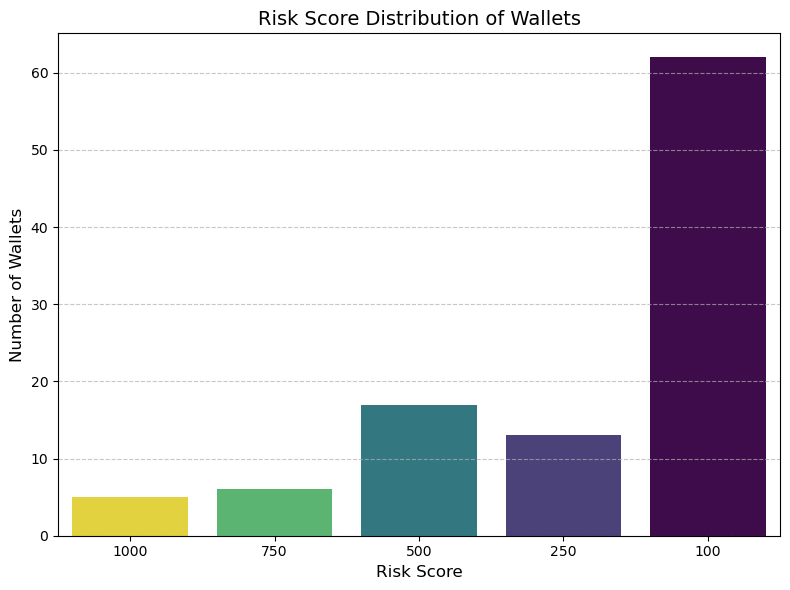

In [16]:

# Plotting Risk Score Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=wallet_scores, x='score', hue='score', palette='viridis', 
              order=sorted(wallet_scores['score'].unique(), reverse=True))
plt.title('Risk Score Distribution of Wallets', fontsize=14)
plt.xlabel('Risk Score', fontsize=12)
plt.ylabel('Number of Wallets', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend([],[], frameon=False)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("risk score distribution of wallets.png", dpi=300)
plt.show()


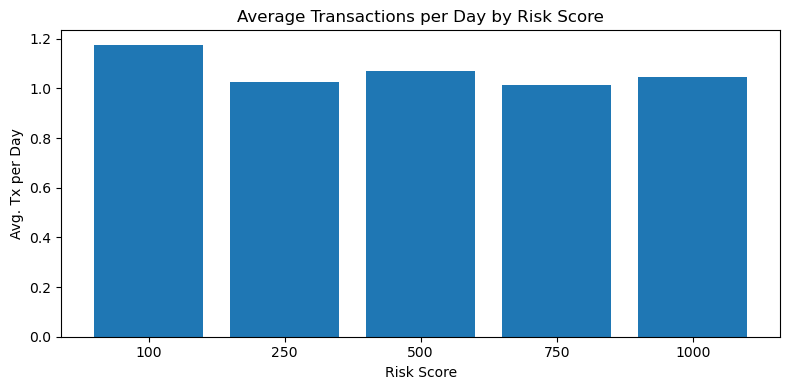

In [17]:
merged = wallet_features.merge(
    wallet_scores,   
    how="left"
)

bucket_means = (merged.groupby("score")["avg_tx_per_day"].mean().sort_index())
plt.figure(figsize=(8, 4))
plt.bar(bucket_means.index.astype(str), bucket_means.values, color="C0")
plt.title("Average Transactions per Day by Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Avg. Tx per Day")
plt.tight_layout()  
plt.savefig("avg_tx_per_day_by_scor.png", dpi=300)
plt.show()

In [18]:
print(bucket_means)

score
100     1.175230
250     1.027819
500     1.072001
750     1.012349
1000    1.045960
Name: avg_tx_per_day, dtype: float64
